# Homework 11

Логистическая регрессия.

## Дополнительные задачи

Если вы считаете, что необходимо выполнить дополнительные шаги, помимо указанных в заданиях ниже, добавьте их в соответствующие разделы по ходу выполнения задания. Используйте заголовок **Дополнительно** в формате **Markdown**, чтобы четко обозначить ваши идеи и их реализацию. Убедитесь, что ваши дополнительные шаги логично дополняют основную задачу и помогают углубить анализ или улучшить модель.


# Logistic Regression

## Датасет

Этот датасет содержит 14 признаков. `target` - целевая переменная, которая  указывает на наличие сердечного заболевания у пациента. Это целое число: `0` — отсутствие заболевания, `1` — наличие заболевания.

Вам необходимо создать модель (логистическая регрессия), которая предсказывает вероятность сердечного заболевания.

**Исходный источник:**  
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)



### Задание 1. Exploratory Data Analysis (EDA)

Делайте с данными всё, что считаете нужным, чтобы лучше их понять. Исследуйте и анализируйте на своё усмотрение.

In [94]:
# Ваш код:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [95]:
data.isnull()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Задание 2. Визуализация

**2.1.** Посмотрите на соотношение классов в целевой переменной (`target`). Все ли в порядке?  
**Ответьте на вопрос:** почему, с вашей точки зрения, важно иметь представление о балансе классов в данных?  

**Подсказка:** Создайте столбчатую диаграмму, показывающую общее количество наблюдений для каждого значения целевой переменной.

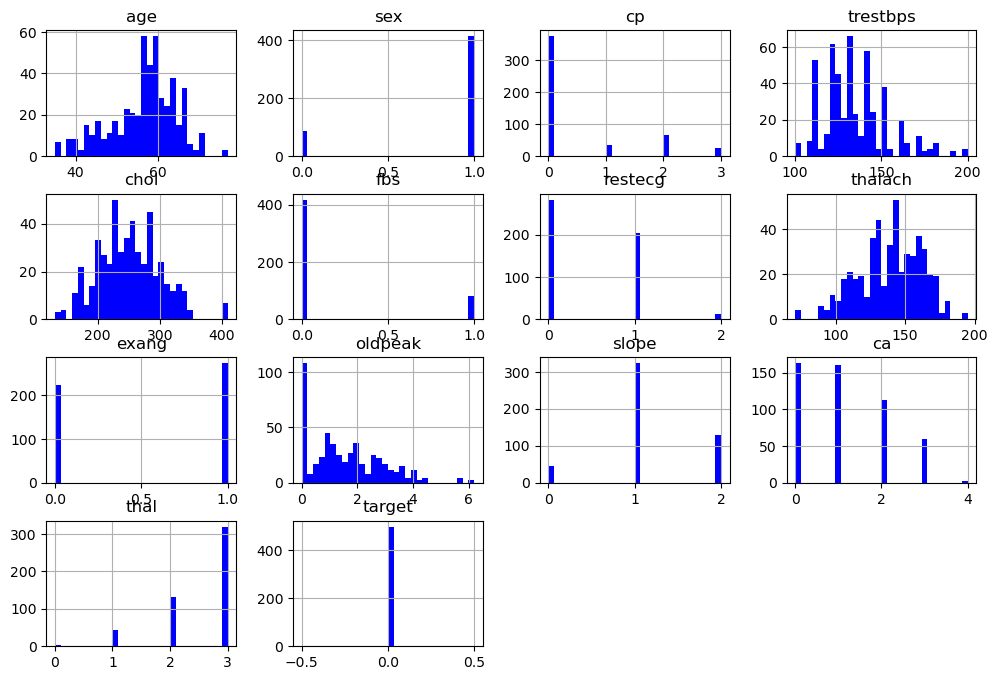

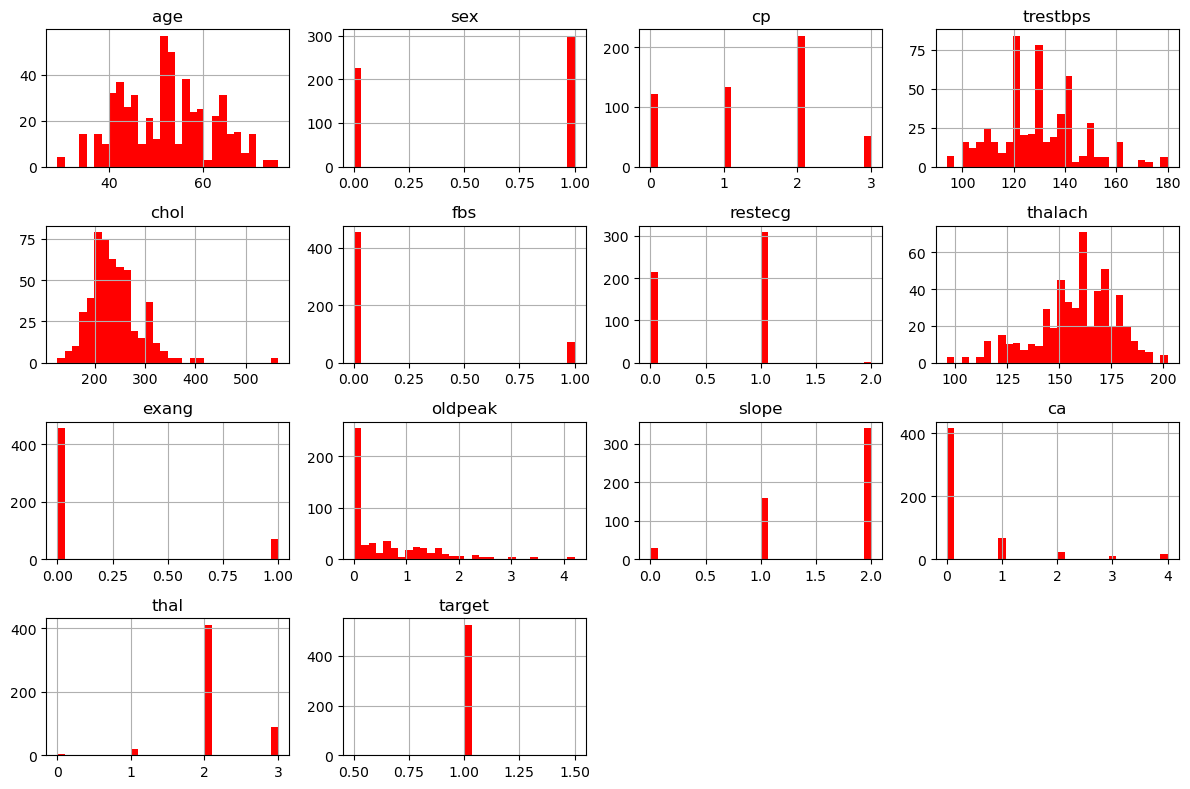

In [96]:
# Ваш код:
data['target'].value_counts()  #Соотношение ровное. Если соотношение было неровным, например 90% и 10%, то модель обучится неправльно.
data0=data[data['target']==0]
data1=data[data['target']==1]
data0.hist(bins=30, figsize=(12,8), color='blue')
data1.hist(bins=30, figsize=(12,8), color='red')
plt.tight_layout()
plt.show()

**2.2.** Постройте гистограмму для визуализации распределения, box plot для оценки медианы, квартилей и выбросов.



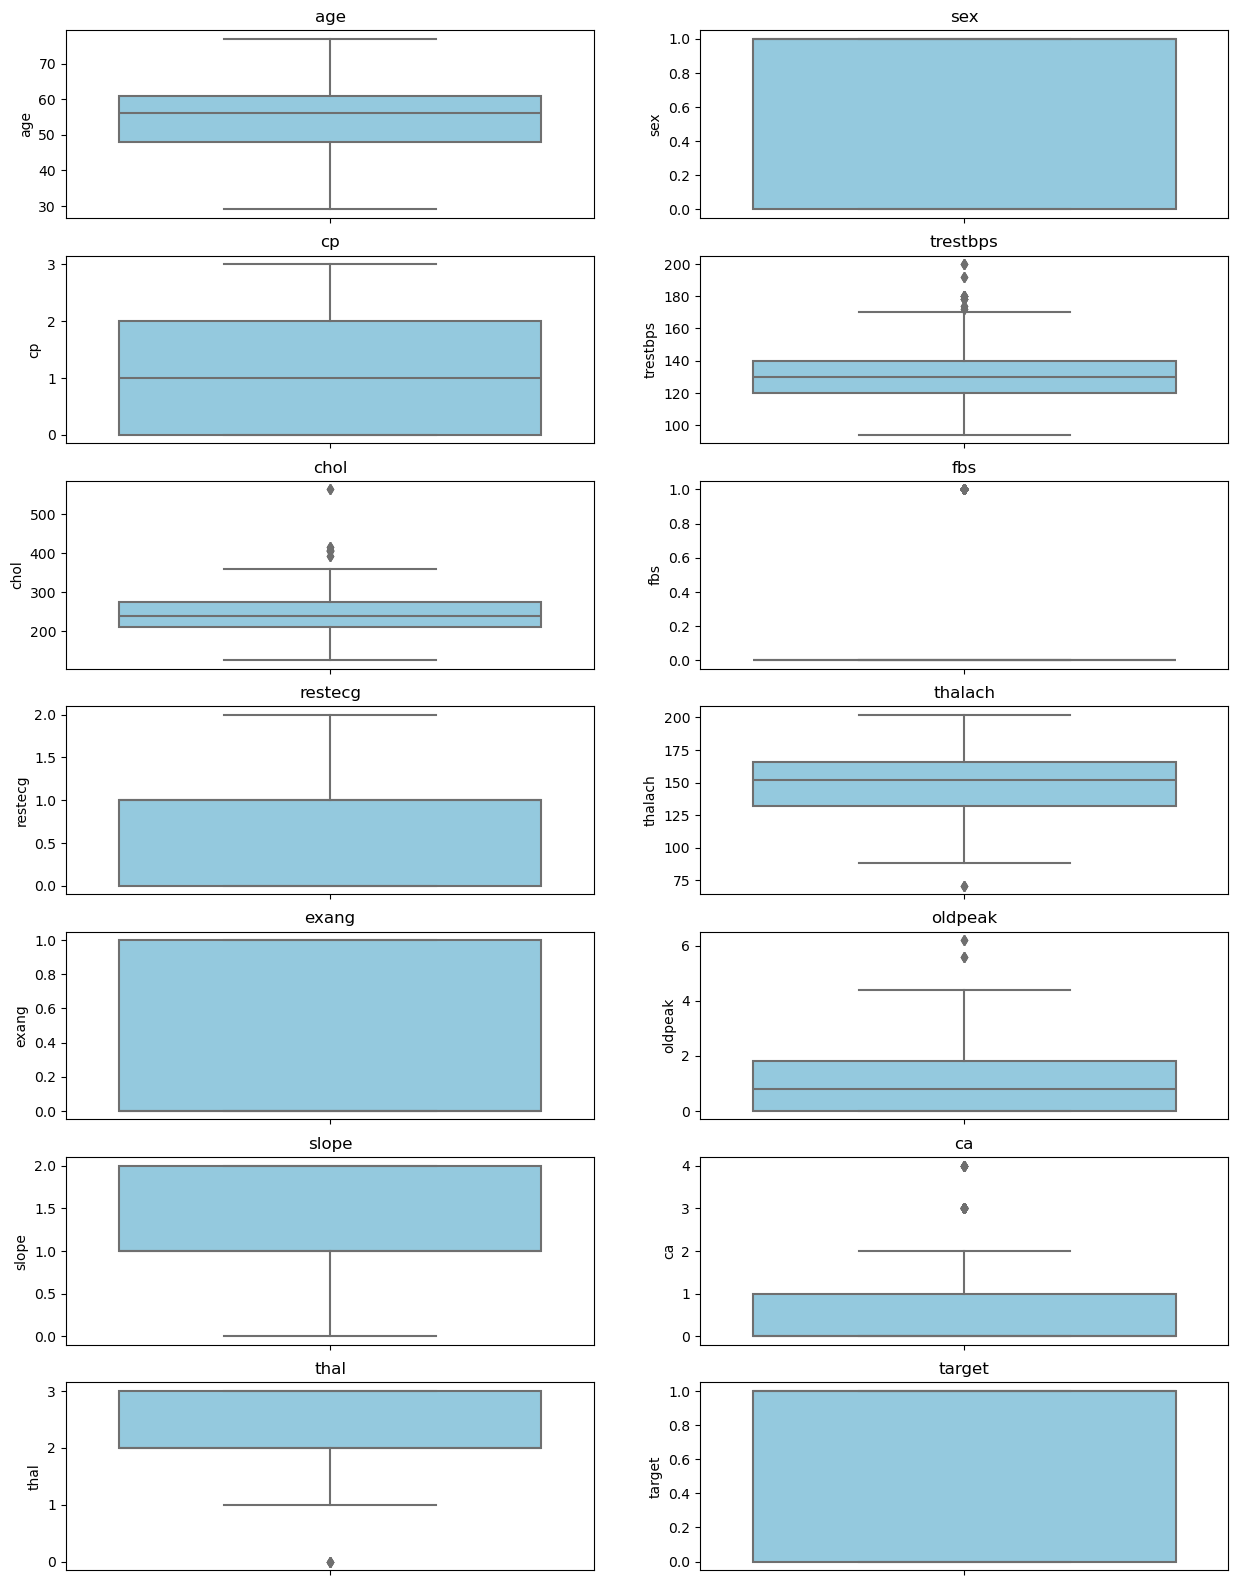

In [97]:
# Ваш код:
plt.figure(figsize=(15, 20))
for i, column in enumerate(data, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(data=data, y=column, color='skyblue')
    plt.title(column)
    plt.ylabel(column)

**2.3.** Визуализируйте корреляции между всеми столбцами в наборе данных.

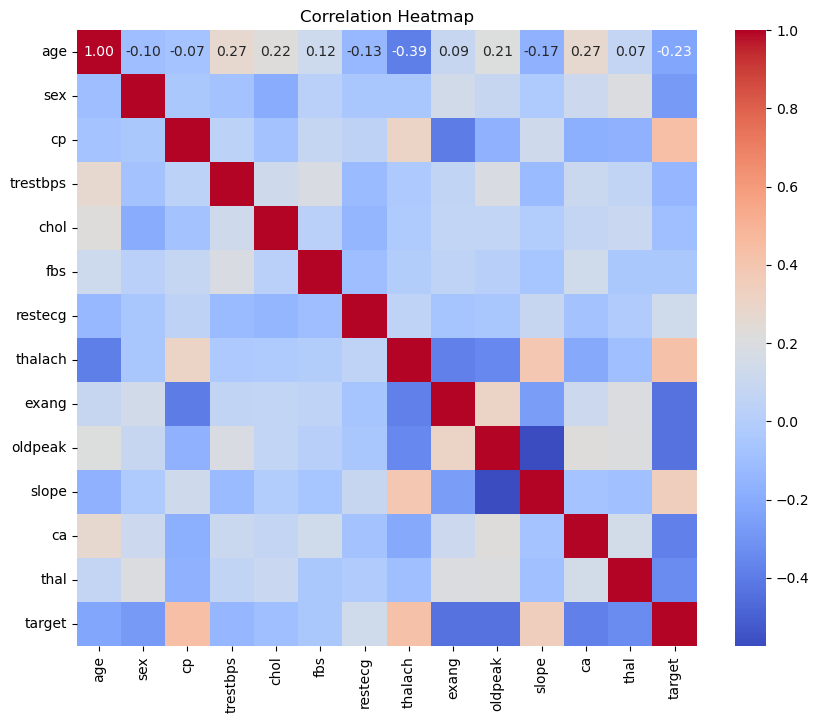

In [98]:
# Ваш код:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Задание 3. Разделение данных
**3.1.** Разделите данные на признаки (X) и целевую переменную (y).


**3.2.** Выполните разделение данных на обучающую и тестовую выборки с размером тестовой выборки 10% и установите параметр random_state равным 101.


In [99]:
# Ваш код:
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Задание 4. Модель
Перед тем как обучить модель, вы можете подготовить данные если они этого требуют.

**4.1.** Постройте модель и выполните её обучение.



In [100]:
# Ваш код:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Создаем и обучаем модель
model = LogisticRegression()
#обучение модели сюда
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)

# Проверяем точность модели
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



C:\Users\izbas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.2.** Попробуйте поэкспериментировать с различными значениями пороги (например, 0.3, 0.5, 0.7) и оцените, как изменение порога влияет на метрики вашей модели (например, точность, полнота, F1-меру).

In [101]:
# Ваш код:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
#Судя по классификационному отчету (classification report), а именно по значению F1-score, 
#размер тестовый выборки, равный 0.3, приводит к снижению точности предсказаний модели.


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       148
           1       0.81      0.92      0.86       160

    accuracy                           0.85       308
   macro avg       0.85      0.84      0.85       308
weighted avg       0.85      0.85      0.85       308



C:\Users\izbas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
#Судя по классификационному отчету (classification report), 
#размер тестовый выборки, равный 0.2, приводит к увелечению точности предсказаний модели.


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       106
           1       0.81      0.96      0.88        99

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



C:\Users\izbas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.3.** Отметьте, какой порог даёт наилучшие метрики для вашей задачи.

In [103]:
#0.2

### Задание 5. Интерпретация
**5.1.** Создайте визуализацию коэффициентов модели с помощью barplot.  


*   Отобразите коэффициенты модели в виде столбчатой диаграммы, где на оси X будут признаки, а на оси Y — значения их коэффициентов.
*   Отсортируйте диаграмму по величине коэффициентов (по возрастанию).


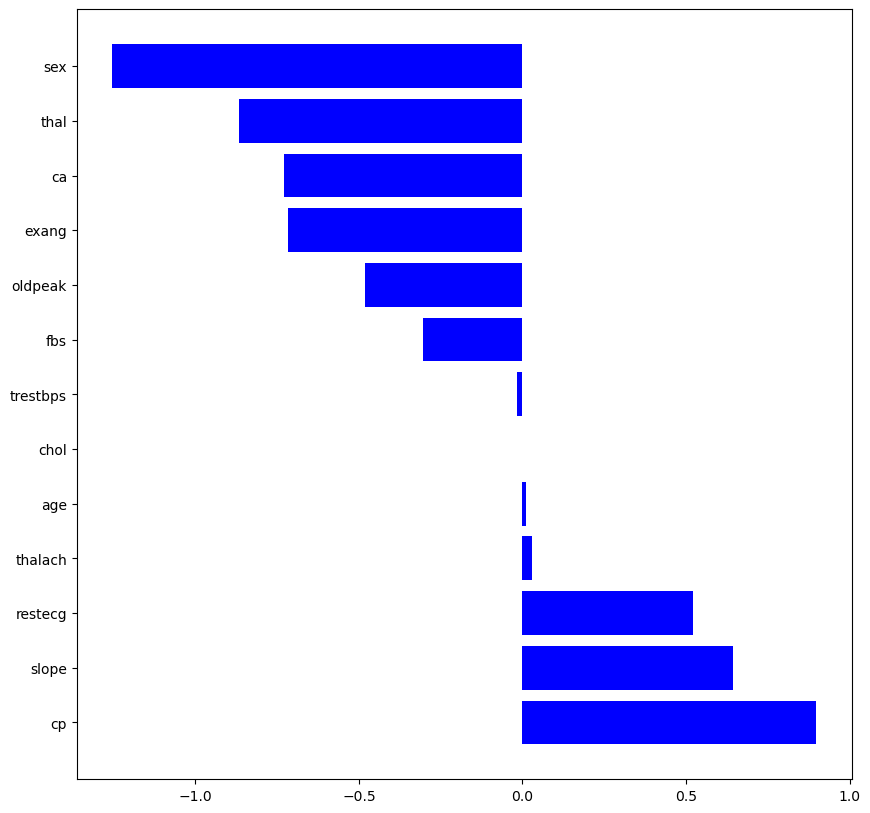

In [104]:
# Ваш код:
feature_names = X.columns
coef_dict = {feature_names[i]: model.coef_[0][i] for i in range(len(feature_names))}
coef_dict = dict(sorted(coef_dict.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 10))
plt.barh(range(len(coef_dict)), coef_dict.values(),color='blue')
plt.yticks(range(len(coef_dict)), coef_dict.keys())
plt.show()

**5.2.** Используйте коэффициенты вашей логистической регрессии, чтобы интерпретировать влияние признаков на вероятность события $y = 1$. Для каждого признака рассчитайте $ e^\beta$ и объясните, как изменяются шансы события $y = 1$ при увеличении признака на $1$ единицу.


In [105]:
# Ваш код:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)
interpretation = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient (β)': coefficients,
    'Odds Ratio (e^β)': odds_ratios
})

print(interpretation)


     Feature  Coefficient (β)  Odds Ratio (e^β)
0        age         0.009639          1.009685
1        sex        -1.254863          0.285115
2         cp         0.898759          2.456554
3   trestbps        -0.016264          0.983868
4       chol        -0.002583          0.997420
5        fbs        -0.303602          0.738154
6    restecg         0.522243          1.685805
7    thalach         0.028829          1.029248
8      exang        -0.715644          0.488877
9    oldpeak        -0.480017          0.618773
10     slope         0.642976          1.902133
11        ca        -0.728972          0.482404
12      thal        -0.867956          0.419809


### Задание 6. Финальная ценка модели


**6.1** Оцените вашу модель на оставшихся 10% данных, используя тестовую выборку.


*   Создайте матрицу ошибок (Confusion Matrix).
*   Постройте графическое представление матрицы ошибок (Confusion Matrix Plot)




In [143]:
# Ваш код:
print(confusion_matrix(y_test, y_pred))

[[83 23]
 [ 4 95]]


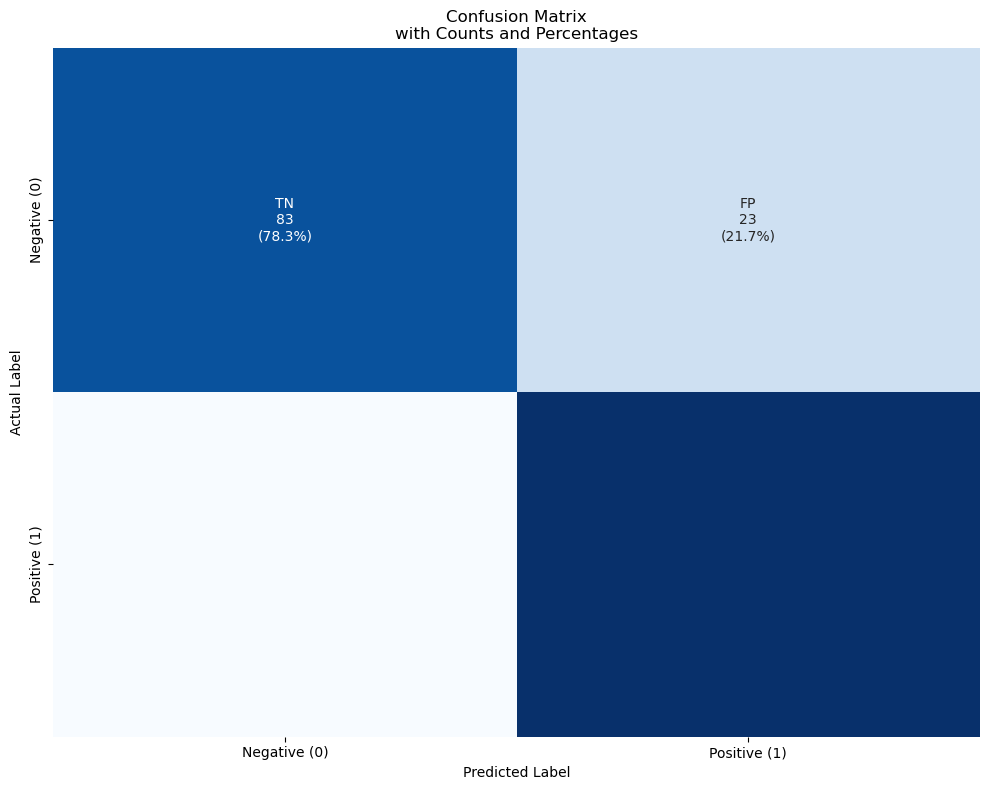

In [145]:


def plot_confusion_matrix_with_percentages(y_test, y_pred):
    # Создаем базовую confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Проверяем на деление на ноль и заменяем такие строки на нули
    cm_percentages = np.zeros_like(cm, dtype=float)
    row_sums = cm.sum(axis=1, keepdims=True)
    np.divide(cm, row_sums, out=cm_percentages, where=row_sums != 0)
    cm_percentages *= 100  # Конвертируем в проценты
    
    # Создаем комбинированные подписи (количество и процент)
    labels = np.asarray([
        [f'TN\n{cm[0,0]}\n({cm_percentages[0,0]:.1f}%)', f'FP\n{cm[0,1]}\n({cm_percentages[0,1]:.1f}%)'],
        [f'FN\n{cm[1,0]}\n({cm_percentages[1,0]:.1f}%)', f'TP\n{cm[1,1]}\n({cm_percentages[1,1]:.1f}%)']
    ])
    
    # Создаем heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix\nwith Counts and Percentages')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.gca().set_xticklabels(['Negative (0)', 'Positive (1)'])
    plt.gca().set_yticklabels(['Negative (0)', 'Positive (1)'])
    plt.tight_layout()
    plt.show()

# Вызов функции с вашими данными
plot_confusion_matrix_with_percentages(y_test, y_pred)


In [146]:
cm

array([[83, 23],
       [ 4, 95]], dtype=int64)